In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import pickle
%matplotlib inline

from modules.csvLoader import csvLoader

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
maison_filtre = csvLoader.load('maison_filtre')

maison_filtre = maison_filtre[['Valeur fonciere','Nombre pieces principales','Surface', 'Prix metre carre']]
# , 'Surface terrain'


Successfully loaded  maison_filtre.csv


In [4]:
print(len(maison_filtre))
print(maison_filtre.isnull().sum())

156783
Valeur fonciere              0
Nombre pieces principales    0
Surface                      0
Prix metre carre             0
dtype: int64


## Etude de la correlation

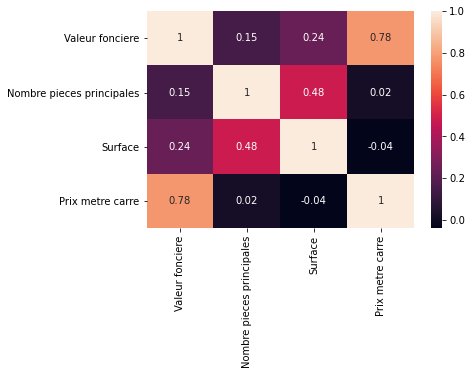

In [5]:
matrice_corr = maison_filtre.corr().round(2)
sns.heatmap(data=matrice_corr, annot=True)
del(matrice_corr)

## Construction du jeu d'entrainement et de test

In [6]:
X = pd.DataFrame(np.c_[maison_filtre['Nombre pieces principales'],maison_filtre['Surface'], maison_filtre['Prix metre carre']])
Y = maison_filtre['Valeur fonciere']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(125426, 3)
(31357, 3)
(125426,)
(31357,)


## Entrainement du modèle

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

## Evaluation du modèle

In [8]:
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('- Lerreur quadratique moyenne est {}'.format(rmse))
print('- le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('- Lerreur quadratique moyenne est {}'.format(rmse))
print('- le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 50600.57325990016
- le score R2 est 0.684872194788098


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 50804.50235627202
- le score R2 est 0.6817734836025761


---
test avec le nombre pieces principales

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 50600.57325990016
- le score R2 est 0.684872194788098

La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 50804.50235627202
- le score R2 est 0.6817734836025761
---
test sans le nombre pieces principales (conclusion le paramètre est insignifiant)

La performance du modèle sur la base dapprentissage
- Lerreur quadratique moyenne est 50604.56008722009
- le score R2 est 0.6848225348907271


La performance du modèle sur la base de test
- Lerreur quadratique moyenne est 50805.001533591465
- le score R2 est 0.6817672301316253

In [9]:
print(len(y_test_predict))
print(len(Y_test))

x = y_test_predict
y = Y_test

# print(len(y_train_predict))
# print(len(Y_train))

# x = y_train_predict
# y = Y_train

print(round(x.min()), round(x.max()))
print(round(y.min()), round(y.max()))

31357
31357
46071 494077
55400 450000


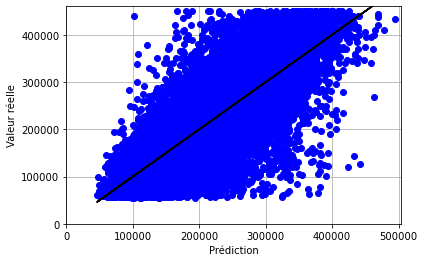

In [10]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'bo', x, poly1d_fn(x), 'k')
plt.grid(b=True)
# plt.xlim(x.min()-10000, x.max()+10000)
plt.xlim(0, x.max()+10000)
# plt.ylim(y.min()-10000, y.max()+10000)
plt.ylim(0, y.max()+10000)
ax = plt.axes()
ax.set_xlabel('Prédiction')
ax.set_ylabel('Valeur réelle')
print()

In [13]:
print(X_test[0:5], '\n')
print('valeur reelle:\n', Y_test[0:5], '\n')
print('valeur predite:\n', y_test_predict[0:5])

          0      1            2
105391  5.0  104.0  1672.387428
43664   6.0  100.0  1921.523211
50078   6.0  120.0  1242.839301
110866  4.0  114.0  1211.166220
82781   5.0  106.0  2423.662741 

valeur reelle:
 105391    210000.0
43664     120000.0
50078      70000.0
110866     80000.0
82781     318000.0
Name: Valeur fonciere, dtype: float64 

valeur predite:
 [169310.97940608 187870.97795493 150997.40286554 138916.18418788
 240264.35523941]


In [12]:
pickle.dump(lmodellineaire, open("modele_lineaire_maison.p", "wb"))

modele_lineaire: LinearRegression = pickle.load(open("modele_lineaire_maison.p","rb"))

nb_piece = 5
surface = 104
prix_metre = 1672

d = {'0': [nb_piece],'1': [surface],'2': [prix_metre]}
df_test = pd.DataFrame(data=d)

prediction = modele_lineaire.predict(df_test)

print(prediction)

[169275.67683105]
